In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [9]:
train = pd.read_csv('../input/train.csv', header=None)
trainLabel = pd.read_csv('../input/trainLabels.csv', header=None)
test = pd.read_csv('../input/test.csv', header=None)
print(train.shape)
print(trainLabel.shape)
print(test.shape)
train.head()
train.info()

(1000, 40)
(1000, 1)
(9000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null fl

In [10]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer

norm = StandardScaler()
norm_train_data = norm.fit_transform(train)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,trainLabel, test_size = 0.30, random_state = 101)

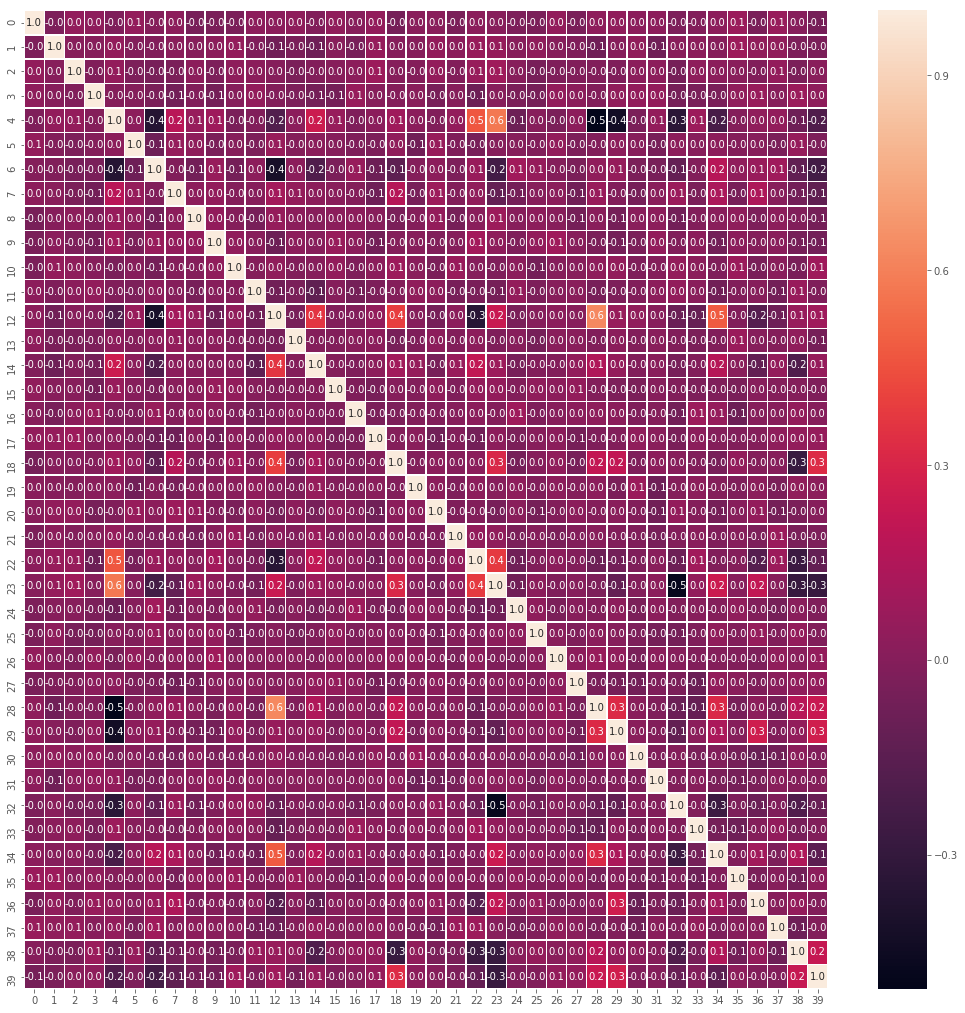

In [24]:
corr = x_train.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr,annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingClassifier()
n_estimators = [5, 7, 10, 15]
max_depth = [3, 5, 7, 15]
random_state = [1, 2, 3, 4]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(x_train, y_train)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\benja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 185 out of 192 | elapsed:    9.5s remaining:    0.3s


Best Accuracy: 0.834286 using {'max_depth': 5, 'n_estimators': 15, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    9.8s finished
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
cls_best = GradientBoostingClassifier(random_state=1, n_estimators=15, max_depth=5)
cls_best.fit(x_train, y_train)

C:\Users\benja\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=15,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
norm_test = norm.transform(test)
print(norm_test)

[[ 2.76183168 -0.21497368 -0.53374498 ...  0.00382642  0.23426124
   1.08047326]
 [-0.39661202  0.55345601  0.10744837 ... -1.48203279  0.40833555
  -0.77563267]
 [-0.11308637  0.17648192  0.41364841 ...  1.26263286 -0.42384223
   0.56951897]
 ...
 [ 0.02647264 -1.68541869 -0.24484549 ...  1.17612522  1.01384868
  -0.89414887]
 [ 1.40711821  0.66590327  0.58737036 ... -0.43304378  1.1014456
   0.83927184]
 [-0.4512308  -0.08495387  1.30931262 ...  0.61238925  1.16629599
   1.31675514]]


In [31]:
pred_prob = cls_best.predict(norm_test)

In [38]:
Id = list(np.arange(1,9001))
target = pd.DataFrame({'Id':Id,'SOLUTION':pred_prob})
target.to_csv('file.csv', index=False)